##  Descriptive Statistics
+ 1. 
    + (a) Import the file melanoma.csv as a tibble called melanoma.
    + (b) Determine type and scale of all variables. You find a description
        of the dataset in the file melanoma description.pdf
    + (c) Change the values of the variables sex, status, ulcer to strings describing their values and add a new variable live.status describing whether the patient is alive or dead.
    + (d) Create a contingency table for the variables sex and live.status.
    + (e) Evaluate the relative risks to survive at least 3 years for the variable sex and interpret the values.
    + (f) Create a summary describing the distribution of the variable age
       containing min, max, mean, the three quartiles depending on the
          variable sex.
    + (g) Create side by side boxplots for the age of persons depending on
       their sex and interpret the diagram.
    + (h) The csv file add.data.melanoma.csv contains data from anotherstudy. Import the dataset as a tibble called add.data.melanoma.
    + (i) Is this dataset tidy?

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# (a)
df<-read.csv('melanoma.csv') %>% as_tibble()
df %>% slice(1:5)

time,status,sex,age,year,thickness,ulcer
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
10,3,1,76,1972,6.76,1
30,3,1,56,1968,0.65,0
35,2,1,41,1977,1.34,0
99,3,0,71,1968,2.90,0
185,1,1,52,1965,12.08,1


In [3]:
# (b)
# time: quantiative, discrete, absolute
# status: qualitative, discrete, nominal
# sex : qualitative ,discrete nominal
# age : quantitative , discrete absolute
# year: quantitative , discrete, interval
# thickness: quantitative, continious, ratio
# ulcer : qualtitative, discrete, nominal

In [4]:
# (c)
df %>% mutate(  
          sex=if_else(sex==1,'male','female'), # sex in string
          ulcer=if_else(ulcer==1,'present','absent'), # ulcer in string
          live.status=if_else(status==2,'alive','dead'), # create new variable live.status
          status=case_when(status==1~'died',status==2~'alive',status==3~'unrelated')
        ) ->df
df %>% slice(1:10)

time,status,sex,age,year,thickness,ulcer,live.status
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>
10,unrelated,male,76,1972,6.76,present,dead
30,unrelated,male,56,1968,0.65,absent,dead
35,alive,male,41,1977,1.34,absent,alive
99,unrelated,female,71,1968,2.90,absent,dead
185,died,male,52,1965,12.08,present,dead
204,died,male,28,1971,4.84,present,dead
210,died,male,77,1972,5.16,present,dead
232,unrelated,female,60,1974,3.22,present,dead
232,died,male,49,1968,12.88,present,dead


In [5]:
# (d)
table(df$sex,df$live.status) %>% addmargins()

,alive,dead,Sum
female,91,35,126
male,43,36,79
Sum,134,71,205


In [6]:
# (e) Evaluate the relative risks to survive at least 3 years for the variable sex and interpret the values.
df %>% filter(time >=3*365)-> time_at_least_three_year
table(time_at_least_three_year$sex,time_at_least_three_year$live.status) %>% addmargins()

,alive,dead,Sum
female,91,19,110
male,42,15,57
Sum,133,34,167


In [7]:

# relative risks for female
# alive -> outcome, female,male->exposure
#relative risk female
91/(91+19) # women have a chance of 82% to survive atleast 3 years
#relative risk male
42/(42+15) # men have a chance of 73% to survive atleast 3 years
# proportion between female and male
(91/(91+19))/(42/(42+15)) # 1.12
# interpretation: females have 1.12 higher risk to survive at least 3 years

[1] 0.8272727

[1] 0.7368421

[1] 1.122727

In [8]:
# (f) Create a summary describing the distribution of the variable age containing min, max, 
          #mean, the three quartiles depending on the variable sex.

df %>% group_by(sex) %>% summarise(
          min=min(age),
          max=max(age),
          mean=mean(age),
          q1=quantile(age,probs = 0.25),
          q2=quantile(age,probs = 0.5),
          q3=quantile(age,probs = 0.75)
        )

sex,min,max,mean,q1,q2,q3
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
female,4,89,51.56349,42.0,54,64.75
male,12,95,53.89873,43.5,55,66.50


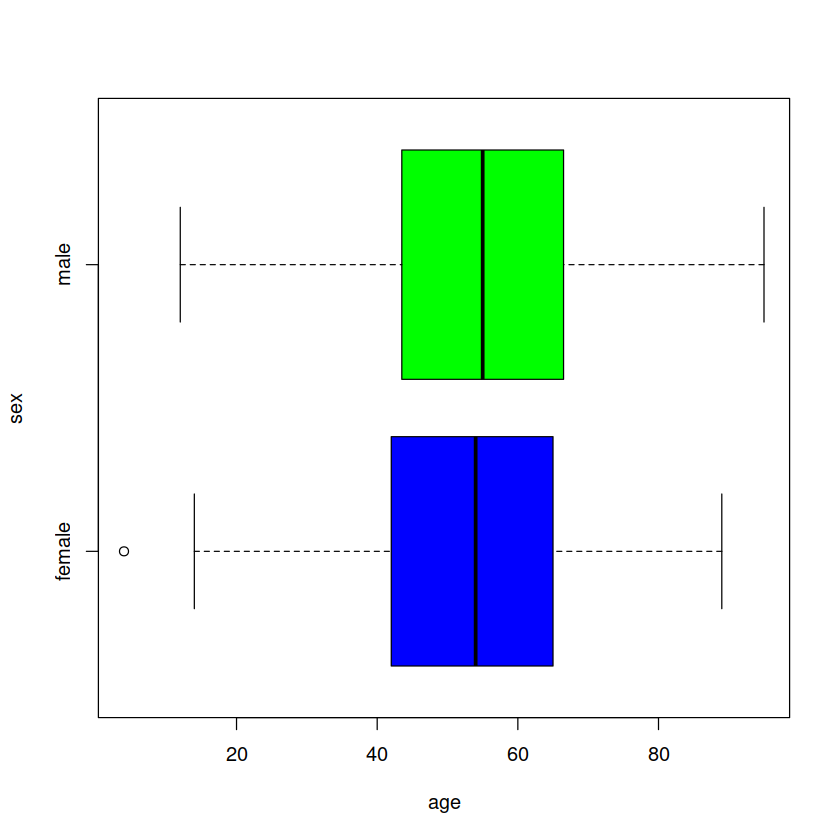

In [9]:
# (g) Create side by side boxplots for the age of persons depending on their sex and interpret the diagram.
boxplot(df$age~df$sex,horizontal = T,col = c('blue','green'),xlab='age',ylab='sex')

In [10]:
#(h) The csv file add.data.melanoma.csv contains data from anotherstudy.
# Import the dataset as a tibble called add.data.melanoma.
df1<-read.csv('add.data.melanoma.csv') %>% as_tibble()
df1 %>% slice(1:10)

time,status,thickness,ulcer,sex_age_year
<int>,<int>,<dbl>,<int>,<chr>
809,2,11.70,0,0/72/1978
1687,3,6.22,0,0/61/1990
1711,3,13.98,0,0/30/1977
682,3,5.06,0,0/72/1987
1034,2,15.38,0,0/71/1977
625,1,7.66,0,0/21/1983
248,2,3.48,0,0/63/1988
1190,1,9.29,0,0/26/1975
1979,2,10.33,0,0/77/1984


In [11]:
# (i) Is this dataset tidy?
# not tidy. bcz the col sex_age_year contains three infos at the same time. so we have to seperate that col into 
# 3 cols
df1 %>% separate(col = sex_age_year,into = c('sex','age','year'),sep='/') %>% slice(1:10)

time,status,thickness,ulcer,sex,age,year
<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
809,2,11.70,0,0,72,1978
1687,3,6.22,0,0,61,1990
1711,3,13.98,0,0,30,1977
682,3,5.06,0,0,72,1987
1034,2,15.38,0,0,71,1977
625,1,7.66,0,0,21,1983
248,2,3.48,0,0,63,1988
1190,1,9.29,0,0,26,1975
1979,2,10.33,0,0,77,1984


## Probability

2. In a computer science course the projects P1, P2, P3, P4 are offered.
    Each of the 60 students must sign up for one of the projects offered.
    All projects are equally popular among the students. Determine the
    probability that
      +  (a) exactly 15 students register for every of the four projects
      +  (b) more than 15 students sign up for project P1.<br>



Assume that the number of places in the projects is unlimited:
   **Hint**: The R functions factorial(n) and choose(n,m) evaluate n! and $  \begin{pmatrix} n \\ m  \end{pmatrix}$.

In [12]:
# (a)
(factorial(60) / ( factorial(15)*factorial(15)*factorial(15)*factorial(15) ))*( 
       (1/4)**15 * (1/4)**15*(1/4)**15*(1/4)**15 )
## multibinomial distribution

[1] 0.002140804

In [13]:
# with r function
dmultinom(x = rep(15,times=4),size=60,prob=rep(1/4,times=4))

[1] 0.002140804

In [14]:
# (b)
# P(X>15)
1-pbinom(q = 15,size=60,prob = 1/4)

[1] 0.4312027

+ Every year, an introductory computer course is held at the beginning
    of the winter semester. From many years of experience, we know that
    about 11% of the registered course participants do not show up for
    the course. Since each participant needs his own computer during the
    course, no more participants can take part in the course than there are
    free computers. In total, there are ten rooms with 22 seats each and a
    total of 240 first-year students. Using an approximation by the central
    limit theorem, calculate

        

+ (a) the probability that all students who are present for the course will find a seat if all first-year students have registered for the course.

In [25]:
# 11% of the registered do not show up
# total pcs = 10*22 == 220 seats
# total of 240 first year students
# central limit theorem
# if we want to approximate a binomial distribution to a normal distribution then, 
# E(x) = n*p
# V(x) = n*p(1-p)
p<-1 - 0.11
n <- 240
# sd = sqrt(variance)
# approximation
pnorm(220,n*p, sqrt(n*p*(1-p)))

[1] 0.9066378

In [26]:
# exact
pbinom(q = 220,size = 240,prob = 0.89)

[1] 0.9273543

+ (b) the minimum number of computers needed so that there is at least a 99% probability that all students who show up will have a computer?
    

In [16]:
qnorm(0.99, 240*0.89, sqrt(n*0.89*(1-0.89)))

[1] 224.8764

+ (c) how many registrations may be accepted at most, if with probability 0.99 all students who show up for the course will find a place in the course with 220 places.

In [17]:
tibble(
n = 220:240
    
p = pnorm(220, n*0.89, sqrt(n*0.89*(1-0.89)))
) %>% filter(p>=0.99) %>% filter(n==max(n))

n,p
<int>,<dbl>
234,0.9929133


## Inferential Statistics

+ 4. To estimate the prevalence of a disease in a population, a random sample of size n=200 is drawn from the population and the individuals are
  screened for for the disease. In the process, m=12 individuals are found
  to have the disease.

+ (a) Show that $X =\frac{m}{n}$is an unbiased estimator of prevalence

As this a binomial distribution, we know $E(m)=np$ and $V(m)=np(1-p)$<br>
now, $E(X)=E(\frac{m}{n})$<br>
     $=\frac{1}{n}E(m)$<br>
     $=\frac{1}{n}np$<br>
     $=p$<br>
so X is an unbiased esmtimator.

+ (b) Determine the variance of the estimator X.

$V(X)=V(\frac{m}{n})$<br>
$=(\frac{1}{n})^2V(m)$<br>
$=\frac{1}{n^2}np(1-p)$<br>
$=\frac{p(1-p)}{n}$

+ (c) Determine an upper 95% confidence bound for prevalence from
  the sample data.

In [18]:
m<-12
n<-200
phat <-  m/n
alpha <- 0.05
## aprox
u <- phat+qnorm(1-alpha)*sqrt((phat*(1-phat)/n))
u

[1] 0.08762179

In [19]:
## exact
binom.test(x = 12,n = 200,p = phat,alternative = 'less',conf.level = 0.95)$conf.int[2]

[1] 0.09540142

+  (d) What is the minimum sample size needed for the upper 95% confidence bound is 0.01 greater than the estimate. Assume that the
    prevalence is ≤ 0.1 and use a normal approximation of the confidence bound.

In [20]:
ceiling((qnorm(1-alpha)/0.01)**2*0.1*(1-0.1))


[1] 2435

5. A company produces chocolade bars with a standard weight of 100 gr.
   As a measure of quality controls he weighs 15 bars and obtains the
    following results: 98.32,97.26,99.85,99.52,95.73,95.56,100.49,98.19,95.16,98.26,96.46,100.23,99.76,98.58,97.43

+ (a) What is an appropriate hypothesis regarding the expected weight
  µ for a two-sided-test?

In [21]:
# a) H0: m0 == 100, H1: m0 != 100

+ (b) If weights can be assumed to be nomally distributed, which test
  should used to test these hypothesis?

In [22]:
# an appropiate test would be t -test because the sd is unknown
# and we are testing mu

+ (c) Conduct the test that was suggested to be used in b) at a 5%
  level. What is your test decision. Specify the p-value.

In [23]:
sample <- c(98.32,97.26,99.85,99.52,95.73,95.56,100.49,98.19,95.16,
            98.26,96.46,100.23,99.76,98.58,97.43)
mu0 <- 100
alpha <- 0.05;
t.test(x = sample, mu = mu0, alternative="two.sided",
       conf.level = 1 -alpha)
# pvalue is = 0.0007251 which is much lower than alpha,
# so we are rejecting the null hypothesis


	One Sample t-test

data:  sample
t = -4.306, df = 14, p-value = 0.0007251
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
 97.08371 99.02295
sample estimates:
mean of x 
 98.05333 


+ (d) Based on the sample, the producer changes the settings in production. To check whether the correction has led to an improvement,
    he again takes 15 chocolate bars and weighs them.
    100.14,100.05,96.51,98.70,98.22,101.06,103.55,100.16,
    100.60,102.85,103.15,100.66,102.52,102.09,100.84
    What is an appropriate hypothesis for comparing the expected
    weights of the two samples?

In [24]:
sample2 <- c(100.14,100.05,96.51,98.70,98.22,101.06,103.55,100.16,
             100.60,102.85,103.15,100.66,102.52,102.09,100.84)
# e)
# H0: mu1 >= mu2 , H1: mu1 < mu 2  
t.test(sample, sample2, alternative="less", paired = F, var.equal =T, 
       conf.level = 1-alpha)
# pvalue = 0.0002228 much lesser than alpha -> reject H0


	Two Sample t-test

data:  sample and sample2
t = -3.9781, df = 28, p-value = 0.0002228
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -1.537796
sample estimates:
mean of x mean of y 
 98.05333 100.74000 


  +  (e) Provide an appropriate statistical test to test the hypothesis and
        perform at the 5% level. Assume that the variances of the populations of the two samples are equal. What is your     test decision?
        Specify the p-value.